<a href="https://colab.research.google.com/github/DeepthiManthapuram/EDA/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(891, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None
missing values after cleaning:
 4
Duplicate rows: 111


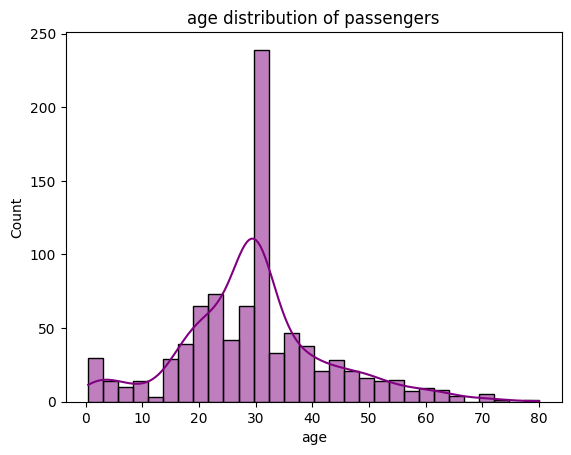

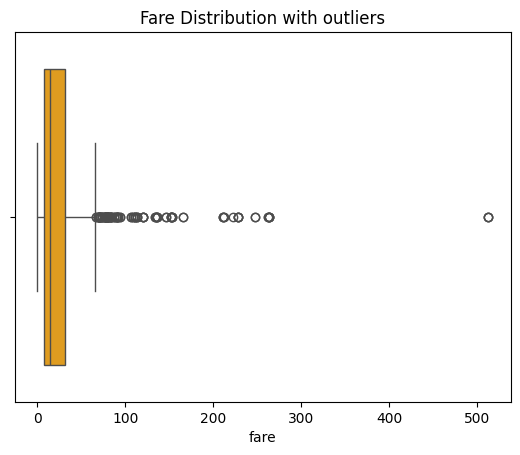

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#load titanic dataset
df = sns.load_dataset('titanic')
df.head()
print(df.shape)
print(df.info())
#summary(df)

#missing values
missing = pd.DataFrame({
    'missing_count':df.isnull().sum(),
    'missing_percent':(df.isnull().sum()/len(df))*100
})
missing.sort_values(by='missing_percent',ascending=False)

#handling missing values
#fill numeric missing values with mean
df['age'] = df['age'].fillna(df['age'].mean())

#fill categorical missing values with mode
df['embarked']=df['embarked'].fillna(df['embarked'].mode([0]))

#drop deck column (too many missing values)
df.drop(columns=['deck'],inplace= True)
print("missing values after cleaning:\n",df.isnull().sum().sum())

#duplicates and data type check
print("Duplicate rows:" ,df.duplicated().sum())

#convert some columns to category type
df['class']=df['class'].astype('category')
df['sex']=df['sex'].astype('category')
df['embarked']=df['embarked'].astype('category')

df.info



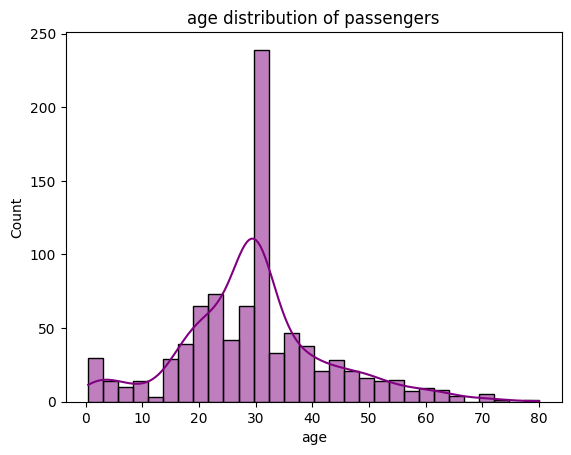

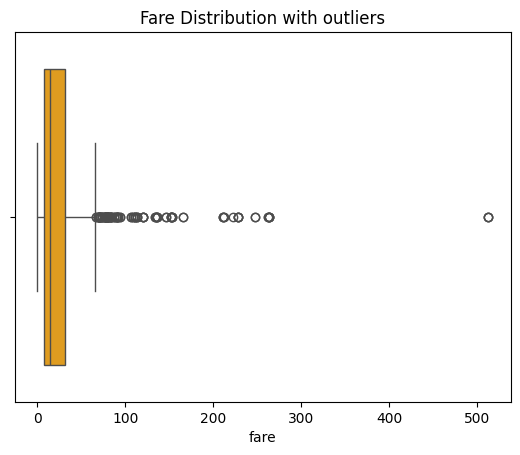

In [ ]:
#univariate analysis -Numerical festures
num_cols=df.select_dtypes(include=['float64','int64']).columns
df[num_cols].describe()

#histogram : age
sns.histplot(df['age'],bins=30,kde=True,color='purple')
plt.title("age distribution of passengers")
plt.show()

#boxplot: Fare
sns.boxplot(x=df['fare'],color='orange')
plt.title("Fare Distribution with outliers")
plt.show()

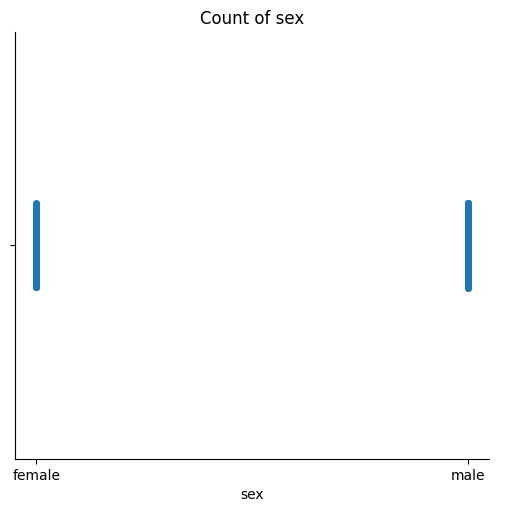

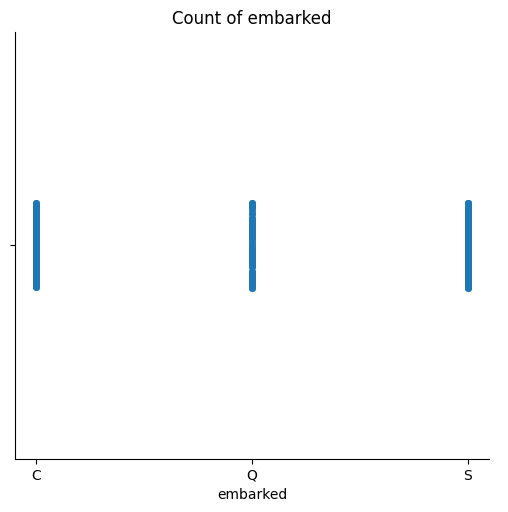

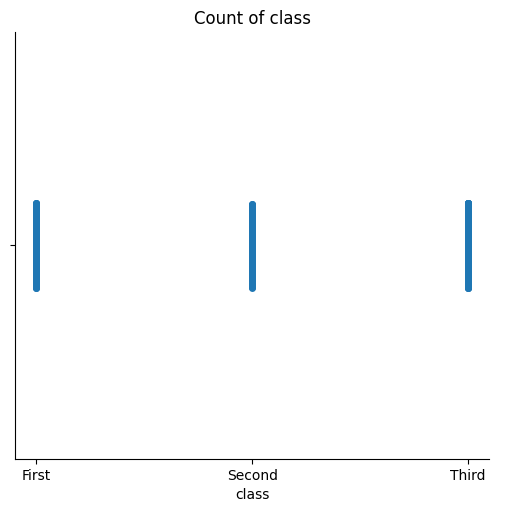

In [ ]:
#Univariate Analysis- categorical analysis
cat_cols = df.select_dtypes('category')
for col in cat_cols:
  sns.catplot(x=col,data=df)
  plt.title(f"Count of {col}")
  plt.show()

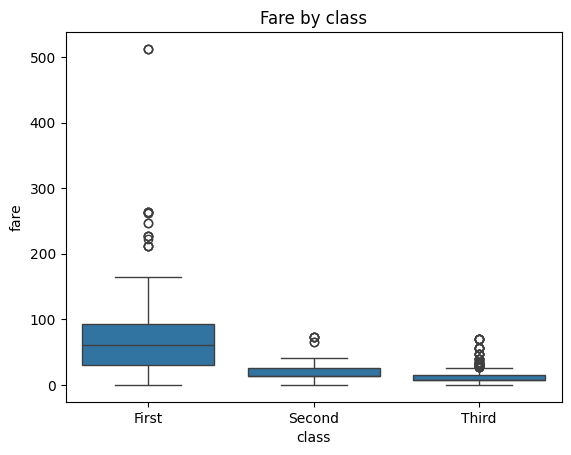

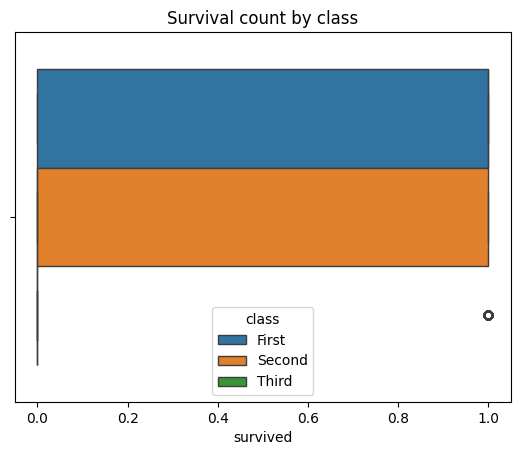

In [ ]:
#Bivariate Analysis - NUmerical vs Categorical
sns.boxplot(x='class',y='fare',data=df)
plt.title("Fare by class")
plt.show()

sns.boxplot(x='survived',hue='class',data=df)
plt.title("Survival count by class")
plt.show()

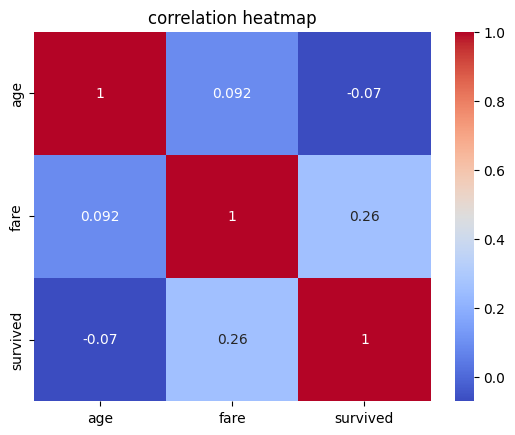

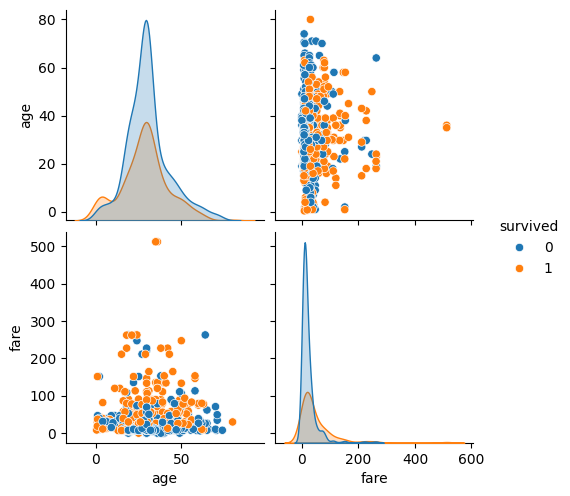

In [ ]:
#correlation and multivariate analysis
corr=df[['age','fare','survived']].corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title("correlation heatmap")
plt.show()

sns.pairplot(df[['age','fare','survived']],hue='survived')
plt.show()

Number of outliers in fare: 116


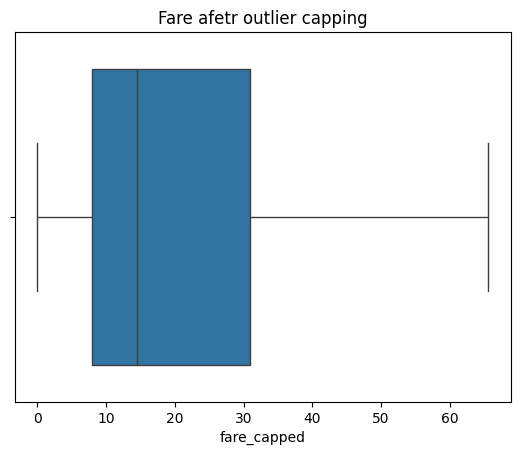

In [ ]:
#Outlier Detection using IOR
q1=df['fare'].quantile(0.25)
q3=df['fare'].quantile(0.75)
IQR = q3-q1
lower=q1-1.5*IQR
upper=q3+1.5*IQR
outliers = df[(df['fare']<lower)|(df['fare'] > upper)]
print("Number of outliers in fare:",len(outliers))

#outliers
df['fare_capped']=df['fare'].clip(lower,upper)
sns.boxplot(x=df['fare_capped'])
plt.title("Fare afetr outlier capping")
plt.show()

Load all required CSV files into your notebook.
Merge them into one dataset using Store, Dept, and Date.
Display the first and last 10 rows.
Print:
.shape
.info()
.describe()
Identify:
Numerical columns
Categorical columns
Date columns
List all unique store types and departments.
7. Identify which columns may require cleaning or type conversion

In [ ]:
#task-1
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_theme(style='whitegrid')

#mount your drive
drive.mount('/content/drive')

patha = '/content/drive/MyDrive/features.csv'
pathb = '/content/drive/MyDrive/stores.csv'

df_features = pd.read_csv(patha)
df_stores = pd.read_csv(pathb)

#merging into one dataset
df = df_features.merge(df_stores)
print(df)

#first 10 rows
print("First 10 rows:\n",df.head(10))
print("\nlast 10 rows:\n",df.tail(10))

print("SHAPE:", df.shape)

print("\nINFO:")
print(df.info())

print("\nDESCRIBE:")
print(df.describe(include='all'))

numerical_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
print("Numerical Columns:", numerical_cols)

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns:", categorical_cols)

date_cols = df.select_dtypes(include=['datetime64[ns]']).columns.tolist()
print("Date Columns:", date_cols)

#print("Unique Store Types:", df['StoreType'].unique())
#print("Unique Departments:", df['Dept'].unique())  # or DeptName

print("\nPossible Cleaning Needs:")

# 1. Missing values
print("\nMissing Values:\n", df.isnull().sum())

# 2. Columns stored as object but should be numeric
object_cols = df.select_dtypes(include=['object']).columns
for col in object_cols:
    try:
        df[col].astype(float)
        print(f"{col}: may need numeric conversion")
    except:
        pass

# 3. Check date-related issues
if 'Date' in df.columns:
    print("\nDate min/max:")
    print(df['Date'].min(), "to", df['Date'].max())




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
      Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0         1  2010-02-05        42.31       2.572        NaN        NaN   
1         1  2010-02-12        38.51       2.548        NaN        NaN   
2         1  2010-02-19        39.93       2.514        NaN        NaN   
3         1  2010-02-26        46.63       2.561        NaN        NaN   
4         1  2010-03-05        46.50       2.625        NaN        NaN   
...     ...         ...          ...         ...        ...        ...   
8185     45  2013-06-28        76.05       3.639    4842.29     975.03   
8186     45  2013-07-05        77.50       3.614    9090.48    2268.58   
8187     45  2013-07-12        79.37       3.614    3789.94    1827.31   
8188     45  2013-07-19        82.84       3.737    2961.49    1047.07   
8189     45  2013-07-26        76.06       3.804     212.

Task 2 — Data Cleaning
Identify missing values using .isnull().sum().
Fill missing numeric values (Temperature, Fuel_Price, CPI, Unemployment) using median.
Fill missing markdown-related fields with mean values.
Convert Date column to datetime format.
Remove duplicate rows.
Reset the index after cleaning.

In [ ]:
#task-2
print("missing values:\n")
print(df.isnull().sum())

numeric_fill_cols = ["Temperature", "Fuel_Price", "CPI", "Unemployment"]

for col in numeric_fill_cols:
    df[col] = df[col].fillna(df[col].median())

markdown_cols = [col for col in df.columns if "MarkDown" in col]

for col in markdown_cols:
    df[col] = df[col].fillna(df[col].mean())

df["Date"] = pd.to_datetime(df["Date"])

df = df.drop_duplicates()

df = df.reset_index(drop=True)

print("Cleaning Completed.")
print(df.info())
print(df.head())


missing values:

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
Type            0
Size            0
dtype: int64
Cleaning Completed.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   MarkDown1     8190 non-null   float64       
 5   MarkDown2     8190 non-null   float64       
 6   MarkDown3     8190 non-null   float64       
 7   MarkDown4     8190 non-null   float64       
 8   MarkDown5     8190 non-null   float64       
 9   CPI           8190 non-null   float6

Task 3 — Outlier Detection & Treatment
Detect outliers in:
Weekly_Sales
Temperature
Fuel_Price
CPI
Use:
Boxplots
IQR method
Identify if extreme sales spikes occur during holiday weeks.
Decide which outliers should be:
Removed
Capped
Kept as business outliers

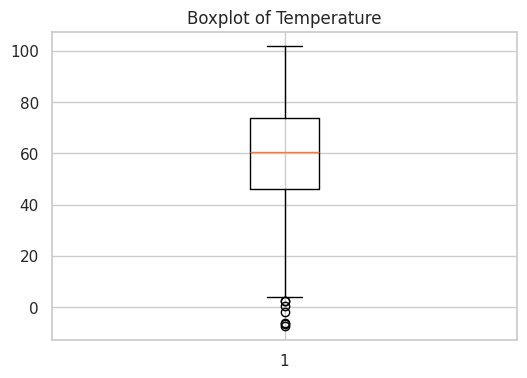

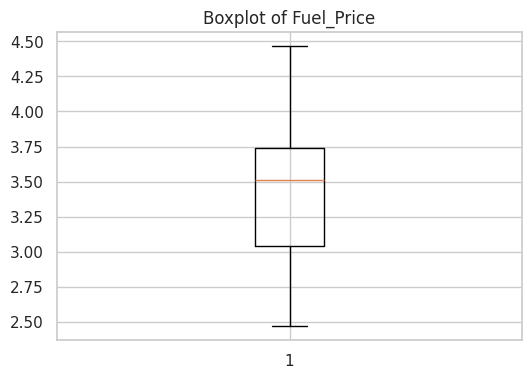

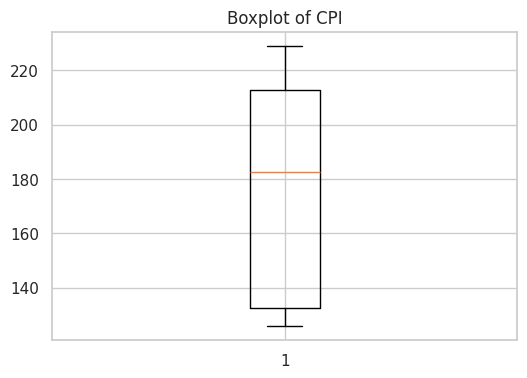

Temperature → Lower: 3.936249999999994, Upper: 115.84625
(7, 14) outliers found

Fuel_Price → Lower: 1.988, Upper: 4.795999999999999
(0, 14) outliers found

CPI → Lower: 12.483943749999995, Upper: 332.93682494999996
(0, 14) outliers found



KeyError: 'Weekly_Sales'

In [ ]:
import matplotlib.pyplot as plt

cols = ["Temperature", "Fuel_Price", "CPI"]

for col in cols:
    plt.figure(figsize=(6,4))
    plt.boxplot(df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    return lower, upper

for col in cols:
    low, high = detect_outliers_iqr(df[col])
    print(f"{col} → Lower: {low}, Upper: {high}")
    print(df[(df[col] < low) | (df[col] > high)].shape, "outliers found\n")




# Remove extreme errors if any
df_clean = df[df["Weekly_Sales"] < df["Weekly_Sales"].quantile(0.995)]

# Cap Temperature/Fuel Price/CPI outliers
for col in ["Temperature", "Fuel_Price", "CPI"]:
    low, high = detect_outliers_iqr(df[col])
    df[col] = df[col].clip(lower=low, upper=high)

# Weekly sales spikes are business outliers → Keep them
